In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn           as sns
import random
from sympy import *

In [ ]:
#np.random.seed(100)

Considerando duas classes equiprováveis:

C1 -> gaussiana bidimensional com média [0 0] e matriz de covariância [1 0; 0 1]

C2 -> gaussiana bidimensional com média [6 6] e matriz de covariância [1 0; 0 1]

Separe o conjunto de dados de treino e teste, com 500 eventos de cada classe em cada conjunto.

**Solução:**

# Gerando as classes

In [ ]:
# Gerando a primeira classe
mean_0  = (0, 0) # média dos dados C1
cov_0   = [[1, 0], [0, 1]] # matriz de covariancia
# C1 -> Classe 1
C1 = np.random.multivariate_normal(mean_0, cov_0, 1000).T

# Gerando a segunda classe
mean_1 = (6, 6)
cov_1  = [[1, 0], [0, 1]]
# C2 -> Classe 2
C2 = np.random.multivariate_normal(mean_1, cov_1, 1000).T 


# Dados de treinamento

In [ ]:
#Trein0 -> dados de treinamento da classe C1
Trein0 = C1[:,0:500]

#Trein1 -> dados de treinamento da classe C2
Trein1 = C2[:,0:500]


# Dados de teste

In [ ]:
#Teste0 -> dados de treinamento da classe C1
Teste0 = C1[:,500:1000]

#Teste1 -> dados de treinamento da classe C2
Teste1 = C2[:,500:1000]



## Questão 1

Obtenha a função discriminante de Bayes e plote a superfície de separação juntamente com 500 eventos de cada classe do conjunto de teste.

**Solução:**

Como feito no trabalho 1 de reconhecimento de padões, a função discriminante de Bayes foi calculada de forma que:

$$P(x/\omega_{1}) - P(x/\omega_{2}) = 0$$

sendo,

$$P(x/\omega_{i}) = \frac{1}{(2\pi)^{\frac{l}{2}\left | \sum _ {i} \right |^{\frac{1}{2}}}}exp\left ( -\frac{1}{2}(x - \mu )^{T} \sum{_{i}^{-1}} (x - \mu )\right )$$

onde $x$ é o vetor formado por $[x_{1} x_{2}]$ e $\mu$ é a matriz de covariância de dimensão $l$x$l$ das classes.

Substituindo os valores dados no enunciado, obtém-se:

$$x_{1}^{2} + x_{2}^{2} -(x_{1} - 6)^{2} - (x_{2} - 6)^{2} = 0$$

Logo, a função discriminante de Bayes é:

$$-12x_{1} - 12x_{2} + 72 = 0$$

Função disciminante

In [ ]:
def func_dis(mean,cov):
  x1 = symbols('x1')
  x2 = symbols('x2')

  m_x = np.array([x1 - mean[0],x2-mean[1]])
  c   = -(len(mean)/2)*(np.log(2*np.pi)) -(0.5)*np.log(np.linalg.det(np.abs(cov)))
  g = np.array(-0.5*m_x.T*np.linalg.inv(cov_1)*m_x).sum(axis  =1).sum() + c
  return g 

In [ ]:
g1 = func_dis(mean_0,cov_0)
g2 = func_dis(mean_1,cov_1)

In [ ]:
f = g1-g2
f = expand(f)

In [ ]:
f

-6.0*x1 - 6.0*x2 + 36.0

In [ ]:
x1 = np.linspace(-4,9,1000)
x2 = -x1 + 6 # função discriminate

Text(0, 0.5, '$X_{2}$ ')

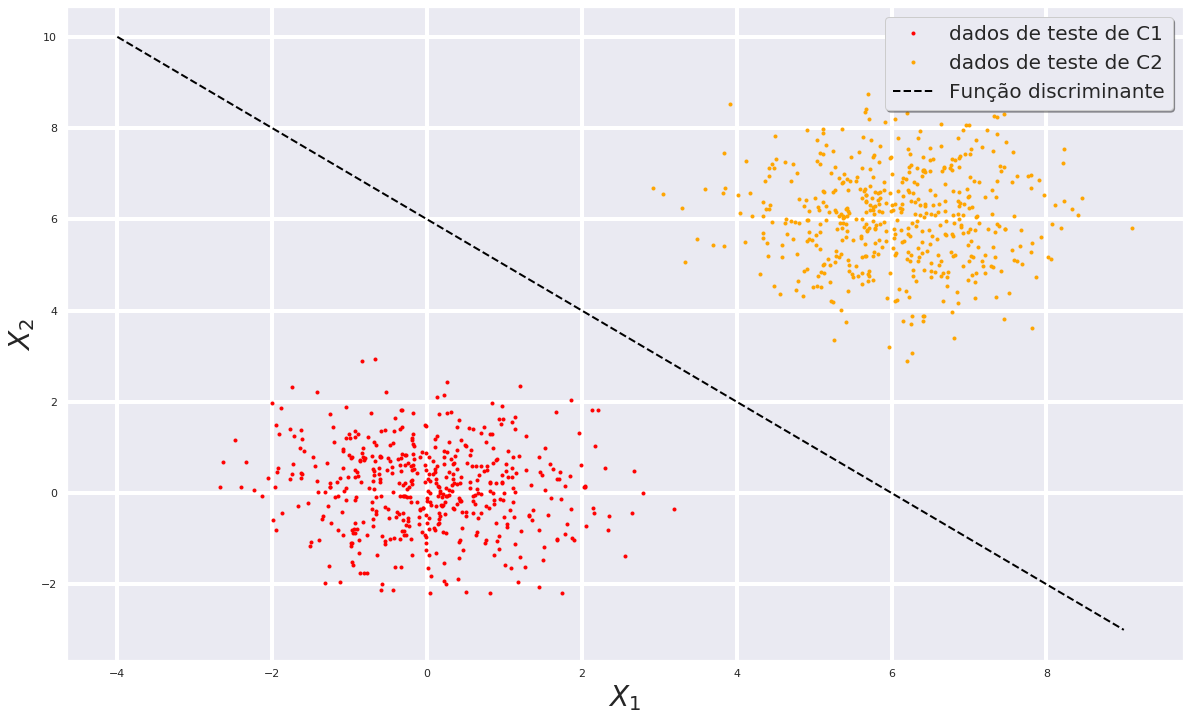

In [ ]:

plt.figure(figsize = [20, 12])
sns.set()
plt.plot(Teste0[0],Teste0[1], '.',color ='Red',label = 'dados de teste de C1' )
plt.plot(Teste1[0],Teste1[1],'.',color = 'orange',label = 'dados de teste de C2' )
plt.plot(x1,x2,'--',color = 'black',label ='Função discriminante',linewidth=2)
#plt.ylim(-3,7)
#plt.xlim(-4,9)
plt.legend(loc='upper right', shadow=True,prop={'size': 20})
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.grid(linestyle='-', linewidth=4)
plt.xlabel('$X_{1}$',fontsize = 28)
plt.ylabel('$X_{2}$ ',fontsize = 28)

## Questão 2

Projete o classificador perceptron utilizando o algoritmo visto nos slides, utilizando o conjunto de treinamento. Anote o resultado e plote a reta de separação (conjunto de teste), comparando com o classificador de Bayes.

**Solução:**

In [ ]:
def perceptron(w,pho,Trein0,Trein1):
  cond1 = w[0]*Trein0[0].T + w[1]*Trein0[1].T + w[2] > 0
  cond2 = w[0]*Trein1[0].T + w[1]*Trein1[1].T + w[2] < 0
  iteracoes = 0
  while ((np.sum(cond1)>0) | (np.sum(cond2)>0)):
    if np.sum(cond1 > 0):
      x_cond1 = Trein0[:,cond1]
      x_cond1 = np.append(x_cond1,np.ones((1,x_cond1.shape[1])),axis =0)
      w = np.array(w) - np.sum(pho*x_cond1,axis = 1)

    if np.sum(cond2 > 0):
      x_cond2 = Trein1[:,cond2]
      x_cond2 = np.append(x_cond2,np.ones((1,x_cond2.shape[1])),axis =0)
      w = np.array(w) +  np.sum(pho*x_cond2,axis = 1)

    cond1 = w[0]*Trein0[0].T + w[1]*Trein0[1].T + w[2] > 0
    cond2 = w[0]*Trein1[0].T + w[1]*Trein1[1].T + w[2] < 0

  return w

In [ ]:
w = [1,1,1]
pho =0.01
w = perceptron(w,pho,Trein0,Trein1)

In [ ]:
a =  w[0]/w[1]
c = w[2]/w[1]
x2_2 = -x1*a - c 

Text(0, 0.5, '$X_{2}$ ')

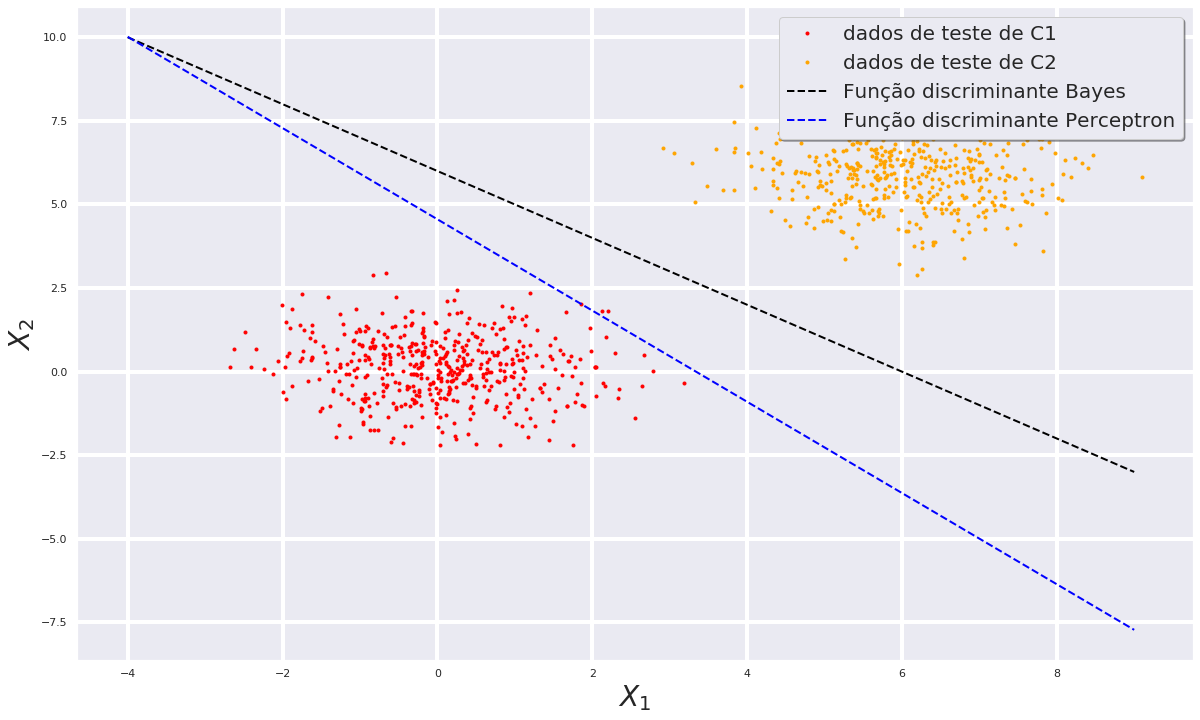

In [ ]:

plt.figure(figsize = [20, 12])
sns.set()
plt.plot(Teste0[0],Teste0[1], '.',color ='Red',label = 'dados de teste de C1' )
plt.plot(Teste1[0],Teste1[1],'.',color = 'orange',label = 'dados de teste de C2' )
plt.plot(x1,x2,'--',color = 'black',label ='Função discriminante Bayes',linewidth=2)
plt.plot(x1,x2_2,'--',color = 'blue',label ='Função discriminante Perceptron',linewidth=2)
#plt.ylim(-3,7)
#plt.xlim(-4,9)
plt.legend(loc='upper right', shadow=True,prop={'size': 20})
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.grid(linestyle='-', linewidth=4)
plt.xlabel('$X_{1}$',fontsize = 28)
plt.ylabel('$X_{2}$ ',fontsize = 28)

## Questão 3

Utilizando agora apenas 50 eventos de cada classe do conjunto de treinamento, projete novamente o classificador perceptron. Anote o resultado e plote a reta de separação (conjunto de teste), comparando com o classificador de Bayes.

**Solução:**

In [ ]:
w = [1,1,1]
pho =0.01
w = perceptron(w,pho,Trein0[:,0:50],Trein1[:,0:50])

In [ ]:
a =  w[0]/w[1]
c = w[2]/w[1]
x2_2 = -x1*a - c 

Text(0, 0.5, '$X_{2}$ ')

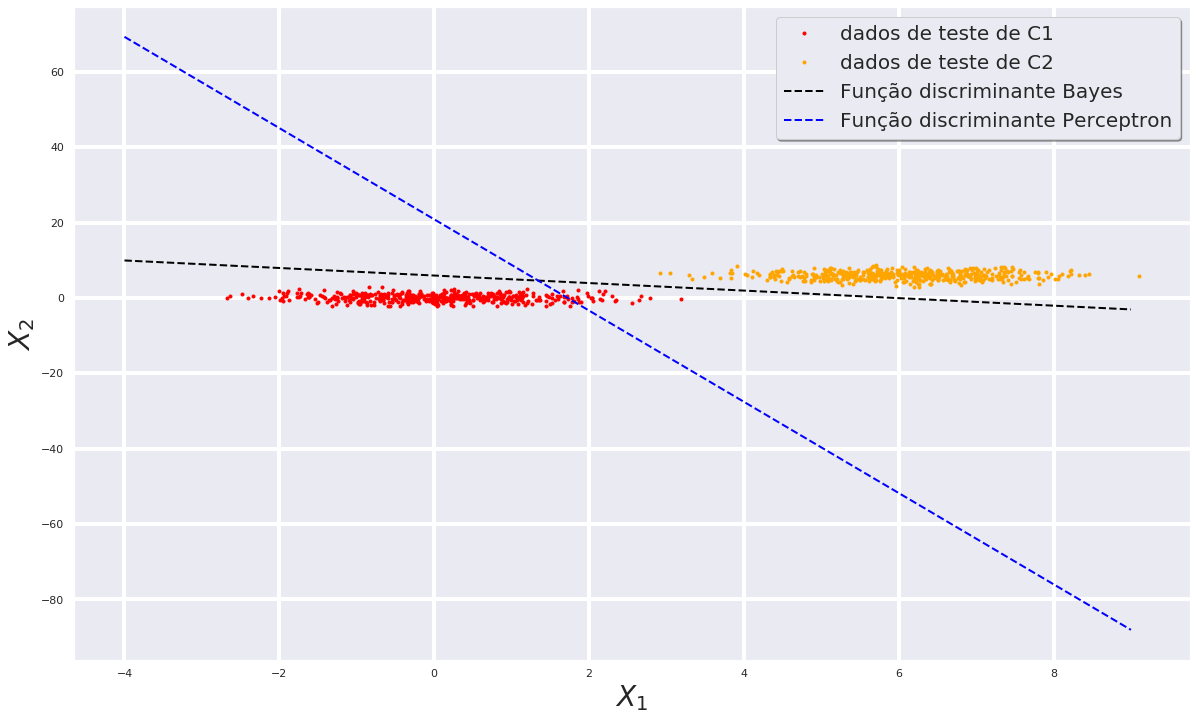

In [ ]:

plt.figure(figsize = [20, 12])
sns.set()
plt.plot(Teste0[0],Teste0[1], '.',color ='Red',label = 'dados de teste de C1' )
plt.plot(Teste1[0],Teste1[1],'.',color = 'orange',label = 'dados de teste de C2' )
plt.plot(x1,x2,'--',color = 'black',label ='Função discriminante Bayes',linewidth=2)
plt.plot(x1,x2_2,'--',color = 'blue',label ='Função discriminante Perceptron',linewidth=2)
#plt.ylim(-3,7)
#plt.xlim(-4,9)
plt.legend(loc='upper right', shadow=True,prop={'size': 20})
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.grid(linestyle='-', linewidth=4)
plt.xlabel('$X_{1}$',fontsize = 28)
plt.ylabel('$X_{2}$ ',fontsize = 28)

## Questão 4

Utilizando agora outros 50 eventos de cada classe do conjunto de treinamento, projete novamente o classificador perceptron. Anote o resultado e plote a reta de separação (conjunto de teste), comparando com o classificador de Bayes.

**Solução:**

In [ ]:
w = [1,1,1]
pho =0.01
w = perceptron(w,pho,Trein0[:,50:100],Trein1[:,50:100])

In [ ]:
a =  w[0]/w[1]
c = w[2]/w[1]
x2_2 = -x1*a - c 

Text(0, 0.5, '$X_{2}$ ')

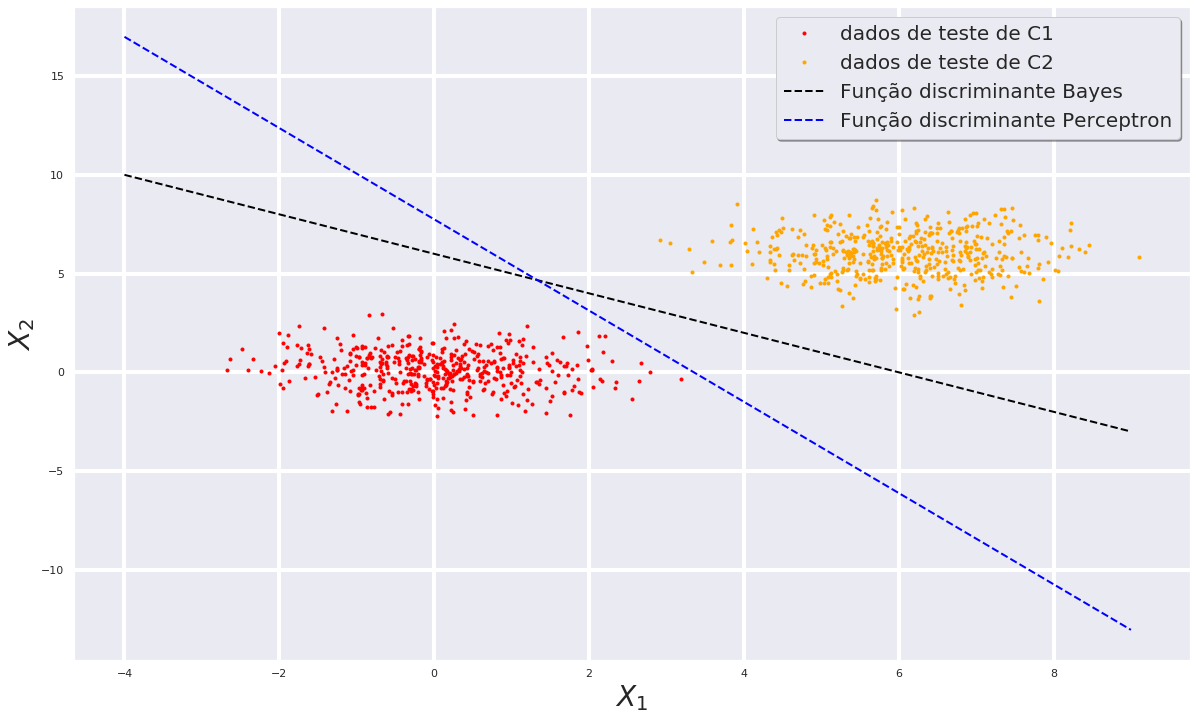

In [ ]:

plt.figure(figsize = [20, 12])
sns.set()
plt.plot(Teste0[0],Teste0[1], '.',color ='Red',label = 'dados de teste de C1' )
plt.plot(Teste1[0],Teste1[1],'.',color = 'orange',label = 'dados de teste de C2' )
plt.plot(x1,x2,'--',color = 'black',label ='Função discriminante Bayes',linewidth=2)
plt.plot(x1,x2_2,'--',color = 'blue',label ='Função discriminante Perceptron',linewidth=2)
#plt.ylim(-3,7)
#plt.xlim(-4,9)
plt.legend(loc='upper right', shadow=True,prop={'size': 20})
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.grid(linestyle='-', linewidth=4)
plt.xlabel('$X_{1}$',fontsize = 28)
plt.ylabel('$X_{2}$ ',fontsize = 28)

## Questão 5

Projete o classificador baseado na minimização do erro ao quadrado (algoritmo da pseudo-inversa), utilizando o conjunto de treinamento. Anote o resultado e plote a reta de separação (conjunto de teste), comparando com o classificador de Bayes.

**Solução:**

In [ ]:
def LMS_pi(Trein0,Trein1):
  X     = np.concatenate((Trein0.T,Trein1.T),axis = 0)
  X     = np.concatenate((X,np.ones((X.shape[0],1))),axis =1)
  y     = np.concatenate((np.ones((Trein0.shape[1],1)),-np.ones((Trein0.shape[1],1))),axis =0)
  aux_1 = np.matmul(X.T,X)
  aux_2 = np.matmul(X.T,y)
  w = np.matmul(np.linalg.inv(aux_1),aux_2)
  return w

In [ ]:
w = LMS_pi(Trein0,Trein1)
a    =  w[0]/w[1]
c    = w[2]/w[1]
x2_2 = -x1*a - c 

Text(0, 0.5, '$X_{2}$ ')

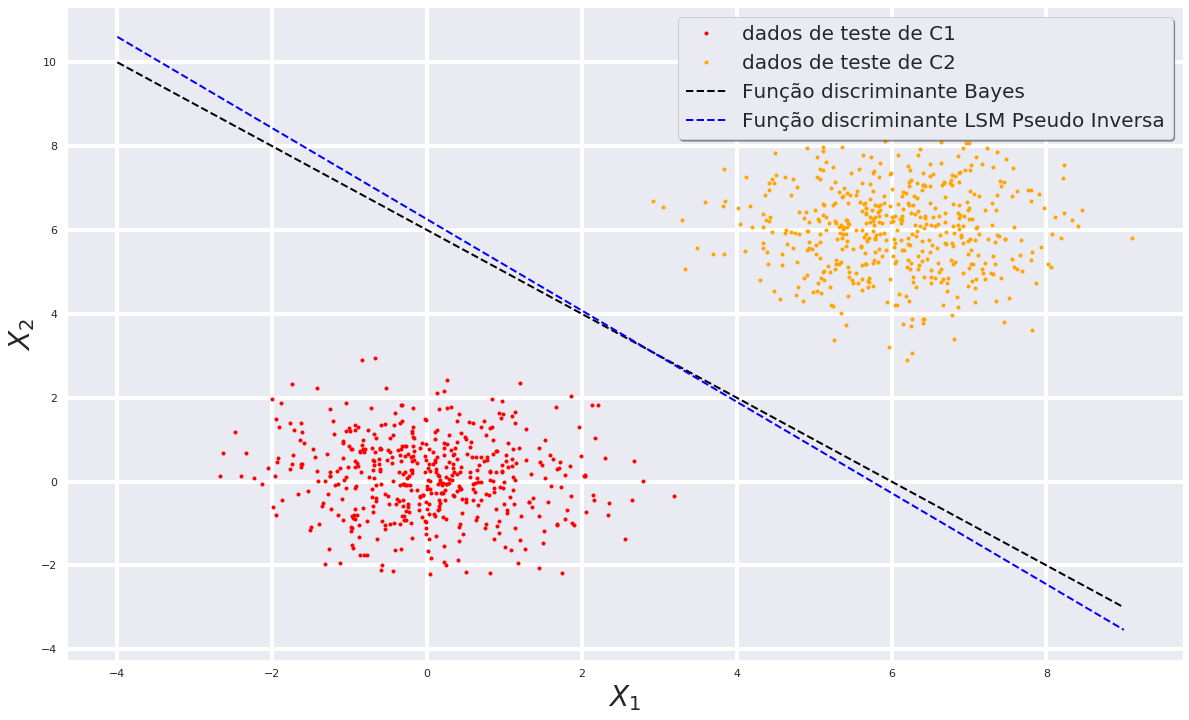

In [ ]:
plt.figure(figsize = [20, 12])
sns.set()
plt.plot(Teste0[0],Teste0[1], '.',color ='Red',label = 'dados de teste de C1' )
plt.plot(Teste1[0],Teste1[1],'.',color = 'orange',label = 'dados de teste de C2' )
plt.plot(x1,x2,'--',color = 'black',label ='Função discriminante Bayes',linewidth=2)
plt.plot(x1,x2_2,'--',color = 'blue',label ='Função discriminante LSM Pseudo Inversa',linewidth=2)
#plt.ylim(-3,7)
#plt.xlim(-4,9)
plt.legend(loc='upper right', shadow=True,prop={'size': 20})
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.grid(linestyle='-', linewidth=4)
plt.xlabel('$X_{1}$',fontsize = 28)
plt.ylabel('$X_{2}$ ',fontsize = 28)

## Questão 6

Utilizando agora apenas 50 eventos de cada classe do conjunto de treinamento, projete novamente o classificador MSE (pseudo-inversa). Anote o resultado e plote a reta de separação (conjunto de teste), comparando com o classificador de Bayes.

**Solução:**

In [ ]:
w    = LMS_pi(Trein0[:,0:50],Trein1[:,0:50])
a    =  w[0]/w[1]
c    = w[2]/w[1]
x2_2 = -x1*a - c 

Text(0, 0.5, '$X_{2}$ ')

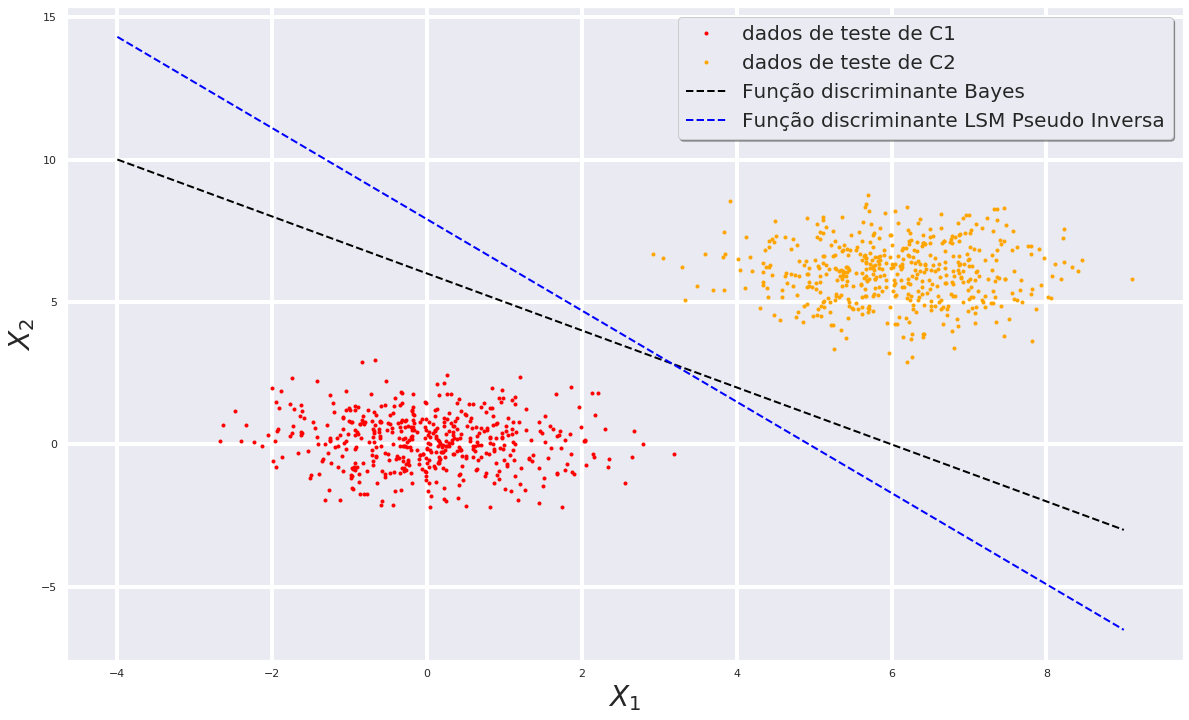

In [ ]:
plt.figure(figsize = [20, 12])
sns.set()
plt.plot(Teste0[0],Teste0[1], '.',color ='Red',label = 'dados de teste de C1' )
plt.plot(Teste1[0],Teste1[1],'.',color = 'orange',label = 'dados de teste de C2' )
plt.plot(x1,x2,'--',color = 'black',label ='Função discriminante Bayes',linewidth=2)
plt.plot(x1,x2_2,'--',color = 'blue',label ='Função discriminante LSM Pseudo Inversa',linewidth=2)
#plt.ylim(-3,7)
#plt.xlim(-4,9)
plt.legend(loc='upper right', shadow=True,prop={'size': 20})
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.grid(linestyle='-', linewidth=4)
plt.xlabel('$X_{1}$',fontsize = 28)
plt.ylabel('$X_{2}$ ',fontsize = 28)

## Questão 7

Utilizando agora outros 50 eventos de cada classe do conjunto de treinamento, projete novamente o classificador MSE (pseudo-inversa). Anote o resultado e plote a reta de separação (conjunto de teste), comparando com o classificador de Bayes.

**Solução:**

In [ ]:
w = LMS_pi(Trein0[:,50:100],Trein1[:,50:100]) 
a = w[0]/w[1] 
c = w[2]/w[1] 
x2_2 = -x1*a - c

Text(0, 0.5, '$X_{2}$ ')

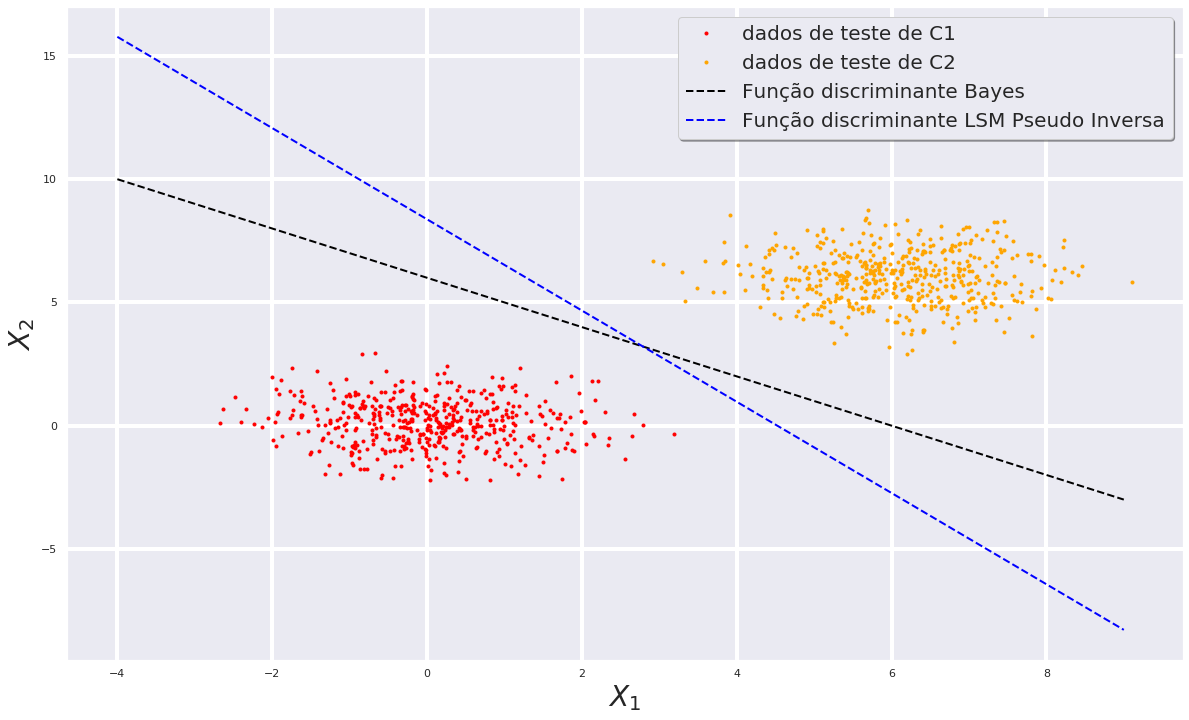

In [ ]:
plt.figure(figsize = [20, 12])
sns.set()
plt.plot(Teste0[0],Teste0[1], '.',color ='Red',label = 'dados de teste de C1' )
plt.plot(Teste1[0],Teste1[1],'.',color = 'orange',label = 'dados de teste de C2' )
plt.plot(x1,x2,'--',color = 'black',label ='Função discriminante Bayes',linewidth=2)
plt.plot(x1,x2_2,'--',color = 'blue',label ='Função discriminante LSM Pseudo Inversa',linewidth=2)
#plt.ylim(-3,7)
#plt.xlim(-4,9)
plt.legend(loc='upper right', shadow=True,prop={'size': 20})
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.grid(linestyle='-', linewidth=4)
plt.xlabel('$X_{1}$',fontsize = 28)
plt.ylabel('$X_{2}$ ',fontsize = 28)

## Questão 8

Projete o classificador SVM linear com margem rígida, utilizando o conjunto de treinamento. Anote o resultado e plote a reta de separação (conjunto de teste), comparando com o classificador de Bayes.

**Solução:**

In [ ]:
from sklearn import svm  # inportar instancia que tem o SVM

In [ ]:
def SVS_linear(C,Trein0,Trein1): # SVM
  clf = svm.SVC(C,kernel = 'linear')  
  x   = np.append(Trein0.T,Trein1.T, axis = 0)
  y   = np.append(np.ones((Trein0.shape[1],1)),-np.ones((Trein1.shape[1],1))) # saída do meu banco de dados
  clf.fit(x,np.ravel(y))
  w = clf.coef_[0]
  a = -w[0]/w[1]
  x2 = a * x1 - (clf.intercept_[0])/w[1]
  return x2, clf

In [ ]:
C = 10000
x2_8, clf = SVS_linear (C ,Trein0,Trein1)

Text(0, 0.5, '$X_{2}$ ')

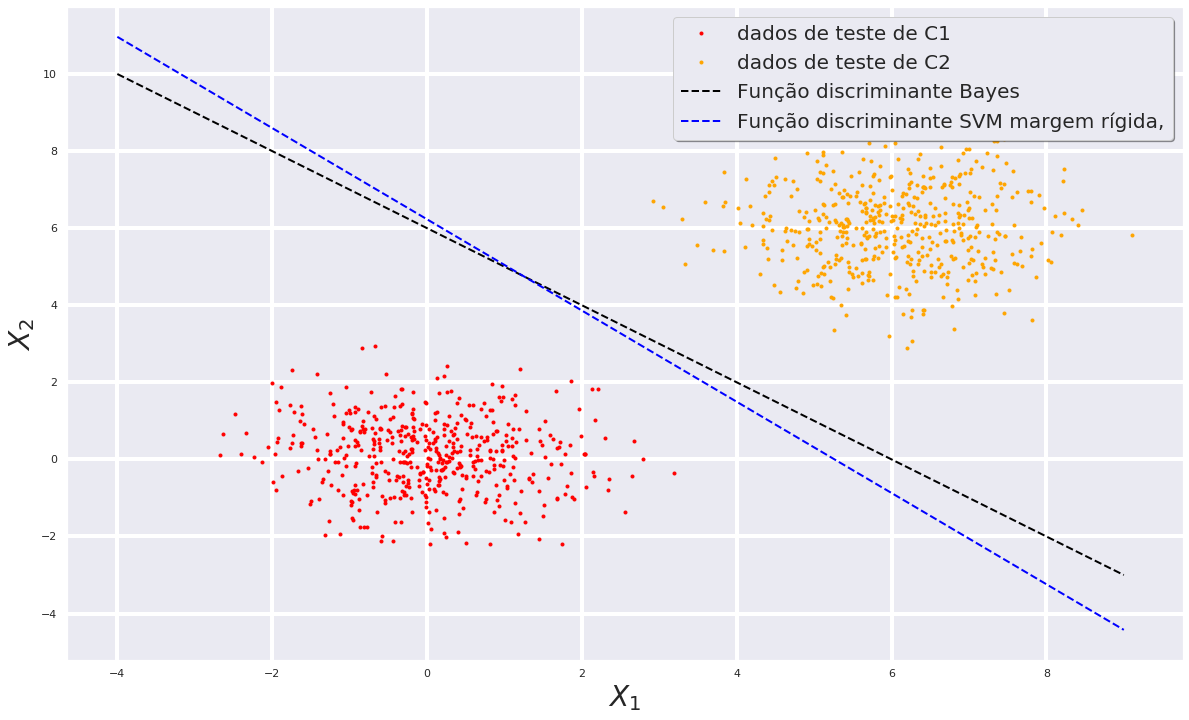

In [ ]:
plt.figure(figsize = [20, 12])
sns.set()
plt.plot(Teste0[0],Teste0[1], '.',color ='Red',label = 'dados de teste de C1' )
plt.plot(Teste1[0],Teste1[1],'.',color = 'orange',label = 'dados de teste de C2' )
plt.plot(x1,x2,'--',color = 'black',label ='Função discriminante Bayes',linewidth=2)
plt.plot(x1,x2_8,'--',color = 'blue',label ='Função discriminante SVM margem rígida,',linewidth=2)
#plt.ylim(-3,7)
#plt.xlim(-4,9)
plt.legend(loc='upper right', shadow=True,prop={'size': 20})
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.grid(linestyle='-', linewidth=4)
plt.xlabel('$X_{1}$',fontsize = 28)
plt.ylabel('$X_{2}$ ',fontsize = 28)

## Questão 9

Projete o classificador SVM linear com margem suave, utilizando o conjunto de treinamento. Anote o resultado e plote a reta de separação (conjunto de teste), comparando com o classificador de Bayes.

**Solução:**

In [ ]:
def linerro(w,c1,c2):
    e1 = sum((w[0]*c1[0] + w[1]*c1[1]+w[2])>0)
    e2 = sum((w[0]*c2[0] + w[1]*c2[1]+w[2])<0)
    e  = e1/len(c1) + e2/len(c2)
    e  = e/2
    return e

In [ ]:
C = np.linspace(0.01,2,20)
e = []
x2_9 = np.zeros((len(C),C1.shape[1]))
for i in range(len(C)):
  x, clf = SVS_linear (C[i] ,Trein0,Trein1)
  w = np.append(clf.coef_,clf.intercept_)
  coef = w/w[1]
  err = linerro(w/w[1],Trein0,Trein1)
  e.append(err)
  x2_9[i] = x


In [ ]:
 ind  = np.argmin(e)
 x2_9 = x2_9[ind] 

Text(0, 0.5, '$X_{2}$ ')

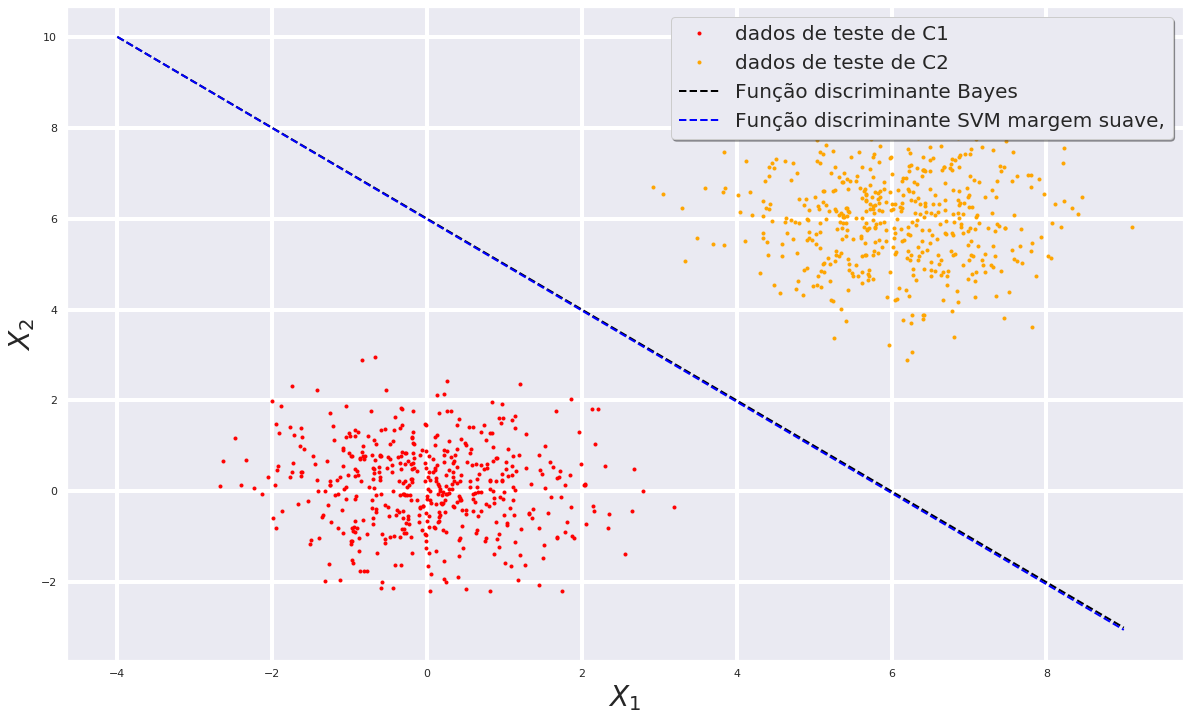

In [ ]:
plt.figure(figsize = [20, 12])
sns.set()
plt.plot(Teste0[0],Teste0[1], '.',color ='Red',label = 'dados de teste de C1' )
plt.plot(Teste1[0],Teste1[1],'.',color = 'orange',label = 'dados de teste de C2' )
plt.plot(x1,x2,'--',color = 'black',label ='Função discriminante Bayes',linewidth=2)
plt.plot(x1,x2_9,'--',color = 'blue',label ='Função discriminante SVM margem suave,',linewidth=2)
#plt.ylim(-3,7)
#plt.xlim(-4,9)
plt.legend(loc='upper right', shadow=True,prop={'size': 20})
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.grid(linestyle='-', linewidth=4)
plt.xlabel('$X_{1}$',fontsize = 28)
plt.ylabel('$X_{2}$ ',fontsize = 28)

## Questão 10

Utilizando agora apenas 50 eventos de cada classe do conjunto de treinamento, projete novamente o classificador SVM linear com margem rígida. Anote o resultado e plote a reta de separação (conjunto de teste), comparando com o classificador de Bayes.

**Solução:**

In [ ]:
C = 10000
x2_10, clf = SVS_linear (C ,Trein0[:,0:50],Trein1[:,0:50])

Text(0, 0.5, '$X_{2}$ ')

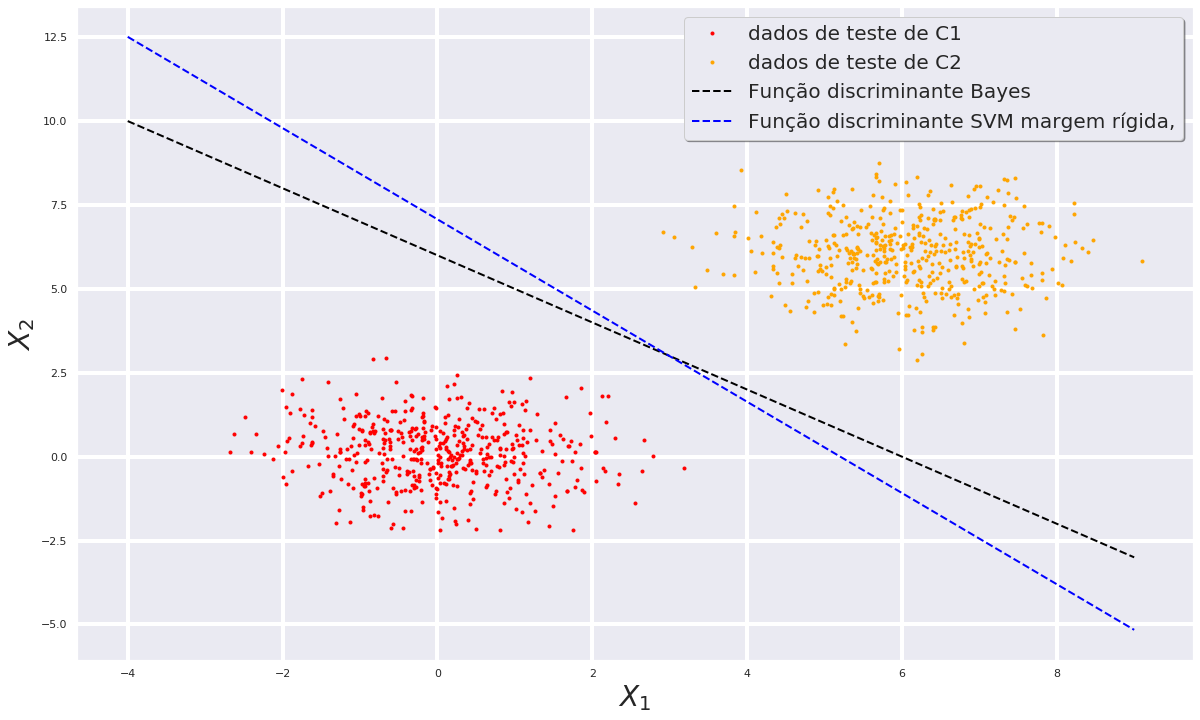

In [ ]:
plt.figure(figsize = [20, 12])
sns.set()
plt.plot(Teste0[0],Teste0[1], '.',color ='Red',label = 'dados de teste de C1' )
plt.plot(Teste1[0],Teste1[1],'.',color = 'orange',label = 'dados de teste de C2' )
plt.plot(x1,x2,'--',color = 'black',label ='Função discriminante Bayes',linewidth=2)
plt.plot(x1,x2_10,'--',color = 'blue',label ='Função discriminante SVM margem rígida,',linewidth=2)
#plt.ylim(-3,7)
#plt.xlim(-4,9)
plt.legend(loc='upper right', shadow=True,prop={'size': 20})
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.grid(linestyle='-', linewidth=4)
plt.xlabel('$X_{1}$',fontsize = 28)
plt.ylabel('$X_{2}$ ',fontsize = 28)

## Questão 11

Utilizando agora outros 50 eventos de cada classe do conjunto de treinamento, projete novamente o classificador SVM linear com margem suave. Anote o resultado e plote a reta de separação (conjunto de teste), comparando com o classificador de Bayes.

**Solução:**

In [ ]:
C = np.linspace(0.01,2,20)
e = []
x2_11 = np.zeros((len(C),C1.shape[1]))
for i in range(len(C)):
  x, clf = SVS_linear (C[i] ,Trein0[:,0:50],Trein1[:,0:50])
  w = np.append(clf.coef_,clf.intercept_)
  coef = w/w[1]
  err = linerro(w/w[1],Trein0,Trein1)
  e.append(err)
  x2_11[i] = x


In [ ]:
 ind  = np.argmin(e)
 x2_11 = x2_11[ind] 

Text(0, 0.5, '$X_{2}$ ')

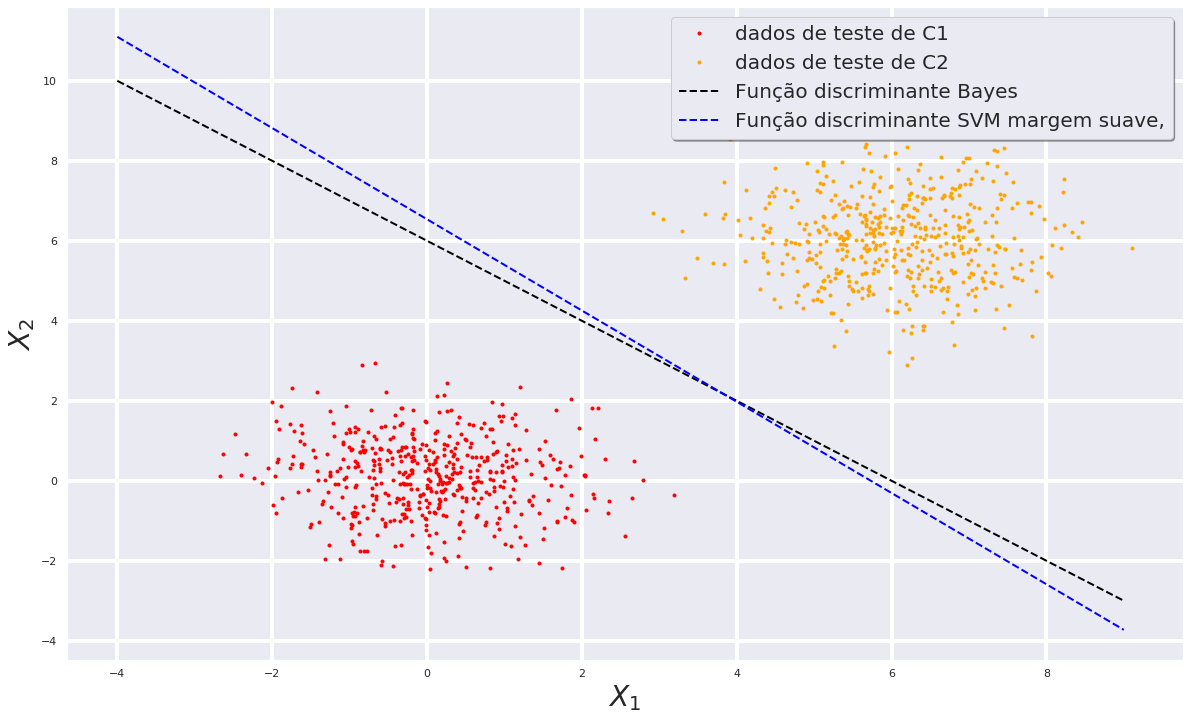

In [ ]:
plt.figure(figsize = [20, 12])
sns.set()
plt.plot(Teste0[0],Teste0[1], '.',color ='Red',label = 'dados de teste de C1' )
plt.plot(Teste1[0],Teste1[1],'.',color = 'orange',label = 'dados de teste de C2' )
plt.plot(x1,x2,'--',color = 'black',label ='Função discriminante Bayes',linewidth=2)
plt.plot(x1,x2_11,'--',color = 'blue',label ='Função discriminante SVM margem suave,',linewidth=2)
#plt.ylim(-3,7)
#plt.xlim(-4,9)
plt.legend(loc='upper right', shadow=True,prop={'size': 20})
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.grid(linestyle='-', linewidth=4)
plt.xlabel('$X_{1}$',fontsize = 28)
plt.ylabel('$X_{2}$ ',fontsize = 28)